In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import PIL.Image as Image

## Goal:
The idea here is to implement a little search engine based on the high-level image representation and k-nearest neighbors

Fit and tune a k-NN classifier
Pick an image from the test set and plot its 10 nearest neighbors from the train set

### load the npz file and create the array to be then used for model training and testing:
- convert the data to float32 to oevent warning message!

In [2]:
with np.load('images_data.npz', allow_pickle=True) as npz_file:
    df = pd.DataFrame(npz_file['values'], columns= npz_file['columns'])
    
df_train = df[df['imageSet'] == 'train']
X_tr = df_train.drop(['imageSet','category','imageFileName'], axis=1).values
X_tr = np.float32(X_tr)
y_tr = df_train.category.values

df_test = df[df['imageSet'] == 'test']
X_te = df_test.drop(['imageSet','category','imageFileName'], axis=1).values
X_te = np.float32(X_te)
y_te = df_test.category.values

FileNotFoundError: [Errno 2] No such file or directory: 'images_data.npz'

### create a k-NN classifier

- let scale the data first as k-NN is sensitive to data scaling

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_te_scaled = scaler.transform(X_te)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_tr_scaled, y_tr) 

# Evaluate on test set
accuracy = knn.score(X_te_scaled, y_te)
print('k-NN accuracy with standardization: {:.3f}'.format(accuracy))

k-NN accuracy with standardization: 0.960


### plot the 10 nearest images in train set from a randomly chosen image in test set:
- randomly choose an image into the test dataset
- scale the image using the scaler from the train phase
- use the function 'kneighbors' from the trined k-NN to get the nearest images from train dataset

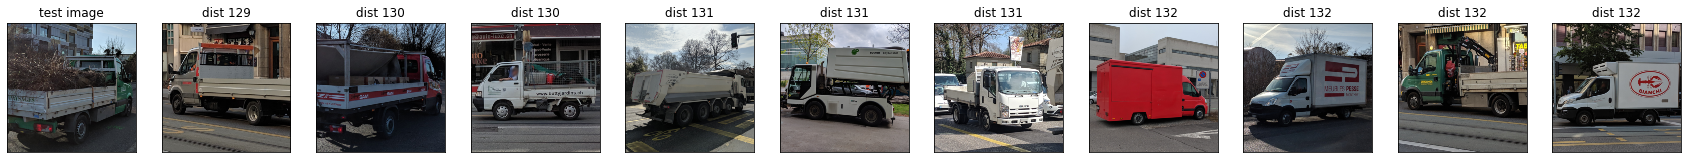

In [15]:
#pick an image from the test
import random
randomImage = random.randint(1,len(X_te)-1)

# get the nearest images
img = scaler.transform(X_te_scaled[randomImage,:].reshape(1,-1))
mynearest = knn.kneighbors(img)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=11, figsize=(30, 30))

# Plot the 10 nearest images 
for i, axis in enumerate(axes.flatten()):
    if (i == 0):
        img = Image.open(df_test['imageFileName'].iloc[randomImage])
        axis.set_title('test image')
    else:
        img  = Image.open(df_train['imageFileName'].iloc[mynearest[1][0][i-1]])
        axis.set_title('dist {}'.format(int(mynearest[0][0][i-1])))
        
    axis.imshow(img)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    
plt.show()